## Import method yang diperlukan

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

## Pre Processing Data

In [4]:
df = pd.read_csv('final_dataset.csv')
df.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [5]:
# Lihat seluruh kolom, analisis yang tidak diperlukan
print(list(df.columns.values))

['GameID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Team1ID_x', 'Team2ID_x', 'Team1_x', 'Team2_x', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1ID_y', 'Team2ID_y', 'Team1_y', 'Team2_y', 'Team1_MapScore', 'Team2_MapScore']


In [6]:
# Buang beberapa kolom yang ditidak diperlukan
df = df.drop(['GameID', 'PlayerName', 'TeamAbbreviation', 'MatchID', 'Team1ID_x', 'Team2ID_x',
              'Team1_x', 'Team2_x', 'Winner', 'EventID', 'EventName', 'EventStage',
              'Team1ID_y', 'Team2ID_y', 'Team1_y', 'Team2_y'], axis=1)

df

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Date,Patch,Team1_MapScore,Team2_MapScore
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,omen,227.0,13.0,12.0,1.0,1.0,124.0,18.0,1.0,0.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108246,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,33.0,0.0,2.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108247,jett,98.0,4.0,15.0,0.0,-11.0,56.0,13.0,1.0,7.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108248,sova,91.0,3.0,14.0,4.0,-11.0,64.0,19.0,0.0,1.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0


In [7]:
# Cek jenis data ditiap kolom
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Date          

In [8]:
# Cek data yang tipenya objek
df[['Agent', 'Map', 'Date']]

,Agent,Map,Date
0,jett,Breeze,2022-01-08 15:30:00
1,chamber,Breeze,2022-01-08 15:30:00
2,sova,Breeze,2022-01-08 15:30:00
3,viper,Breeze,2022-01-08 15:30:00
4,skye,Breeze,2022-01-08 15:30:00
...,...,...,...
108245,omen,Bind,2020-07-31 14:00:00
108246,phoenix,Bind,2020-07-31 14:00:00
108247,jett,Bind,2020-07-31 14:00:00
108248,sova,Bind,2020-07-31 14:00:00


In [9]:
# Jumlah nilai unik
print("Agent:", df['Agent'].nunique())
print("Map:", df['Map'].nunique())
print("Date", df['Date'].nunique())

Agent: 17
Map: 7
Date 3520


In [10]:
# Perbaiki nilai date sehingga hanya diambil jam-nya saja
df['Date_Note'] = df['Date'].str.replace(':', '.')
df['Date_Note'] = df['Date_Note'].str[11:15]
df['Date_Note'] = df['Date_Note'].astype(float)

conditions = [
    (0 <= df['Date_Note']) & (df['Date_Note'] < 6),
    (6 <= df['Date_Note']) & (df['Date_Note'] < 12),
    (12 <= df['Date_Note']) & (df['Date_Note'] < 18),
    (18 <= df['Date_Note']) & (df['Date_Note'] <= 24)
    ]

values = ['Night', 'Morning', 'Afternoon', 'Evening']

df['Note'] = np.select(conditions, values)

df.head()

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Date,Patch,Team1_MapScore,Team2_MapScore,Date_Note,Note
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon


In [11]:
# Drop yang tidak perlu
df = df.drop(['Date_Note', 'Date'], axis=1)
df.head()

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Patch,Team1_MapScore,Team2_MapScore,Note
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon


In [12]:
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Patch         

## Pre Processing Data (One Hot Encoding)

In [13]:
# One Hot Encoding untuk Agent, Map, Note
df_encoded = pd.get_dummies(df, columns=['Note', 'Agent', 'Map',])
df_encoded

,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Agent_sova,Agent_viper,Agent_yoru,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Split
0,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,3.0,...,1,0,0,0,0,1,0,0,0,0
3,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,3.0,...,0,1,0,0,0,1,0,0,0,0
4,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,227.0,13.0,12.0,1.0,1.0,124.0,18.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
108246,110.0,4.0,13.0,4.0,-9.0,84.0,33.0,0.0,2.0,-2.0,...,0,0,0,0,1,0,0,0,0,0
108247,98.0,4.0,15.0,0.0,-11.0,56.0,13.0,1.0,7.0,-6.0,...,0,0,0,0,1,0,0,0,0,0
108248,91.0,3.0,14.0,4.0,-11.0,64.0,19.0,0.0,1.0,-1.0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Simpan ke csv agar mudah digunakan
df_encoded.to_csv('dataset_encoded_one_hot.csv', index=False)

In [14]:
# Cek jenis data ditiap kolom
print(list(df_encoded.dtypes))

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('ui

## Pre Processing Data (Standarisasi)

In [15]:
# Lihat seluruh fitur
print(list(df_encoded.columns.values))

['ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Patch', 'Team1_MapScore', 'Team2_MapScore', 'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split']


In [16]:
# Standarisasi semua fitur kecuali yang fitur hasil one hot encoding
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
column = []

for i in list(df_encoded.columns.values):
  if "Note_" not in i and "Agent_" not in i and "Map_" not in i:
    column.append(i)

df_encoded_standarization = df_encoded.copy()
df_encoded_standarization[column] = scaler.fit_transform(df_encoded[column])
df_encoded_standarization.head()

,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Agent_sova,Agent_viper,Agent_yoru,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Split
0,1.773328,1.724370,-1.180433,-0.717402,2.228358,1.628564,0.829956,1.111593,1.201549,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.390898,0.265535,-1.180433,0.573506,0.956092,0.767288,-0.831812,-0.606890,-0.656004,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,0.374824,0.447889,-1.439541,0.896233,1.274159,0.437977,0.386818,0.538765,-1.275188,1.405793,...,1,0,0,0,0,1,0,0,0,0
3,0.246225,0.447889,-0.662216,-1.040129,0.797059,0.260656,-0.499458,0.538765,-1.275188,1.405793,...,0,1,0,0,0,1,0,0,0,0
4,-1.972092,-1.740364,-0.403108,-0.717402,-1.270374,-1.917865,-0.167105,0.538765,-0.656004,0.937195,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Simpan ke csv agar mudah digunakan
df_encoded_standarization.to_csv('dataset_encoded_standarization.csv', index=False)

## Selected Feature

In [17]:
# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'Note_Afternoon', 'Note_Evening', 'Note_Morning',
#           'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra',
#           'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy',
#           'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper',
#           'Agent_yoru', 'ADR', 'FirstKills']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night']]


# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           ''Note_Afternoon', Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
#           'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye',
#           'Agent_sova', 'Agent_viper', 'Agent_yoru']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
#           'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye',
#           'Agent_sova', 'Agent_viper', 'Agent_yoru', 'FirstKills', 'FirstDeaths']]

selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'Map_Ascent', 'Map_Bind', 'Map_Breeze',
          'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone',
          'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix',
          'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR', 'FirstKills']]


In [30]:
selected_feature.head()

,ACS,Kills,Deaths,Assists,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,...,Agent_phoenix,Agent_raze,Agent_reyna,Agent_sage,Agent_skye,Agent_sova,Agent_viper,Agent_yoru,ADR,FirstKills
0,1.773328,1.724370,-1.180433,-0.717402,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.628564,1.111593
1,0.390898,0.265535,-1.180433,0.573506,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.767288,-0.606890
2,0.374824,0.447889,-1.439541,0.896233,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.437977,0.538765
3,0.246225,0.447889,-0.662216,-1.040129,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0.260656,0.538765
4,-1.972092,-1.740364,-0.403108,-0.717402,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,-1.917865,0.538765


## Elbow Method (K Means)

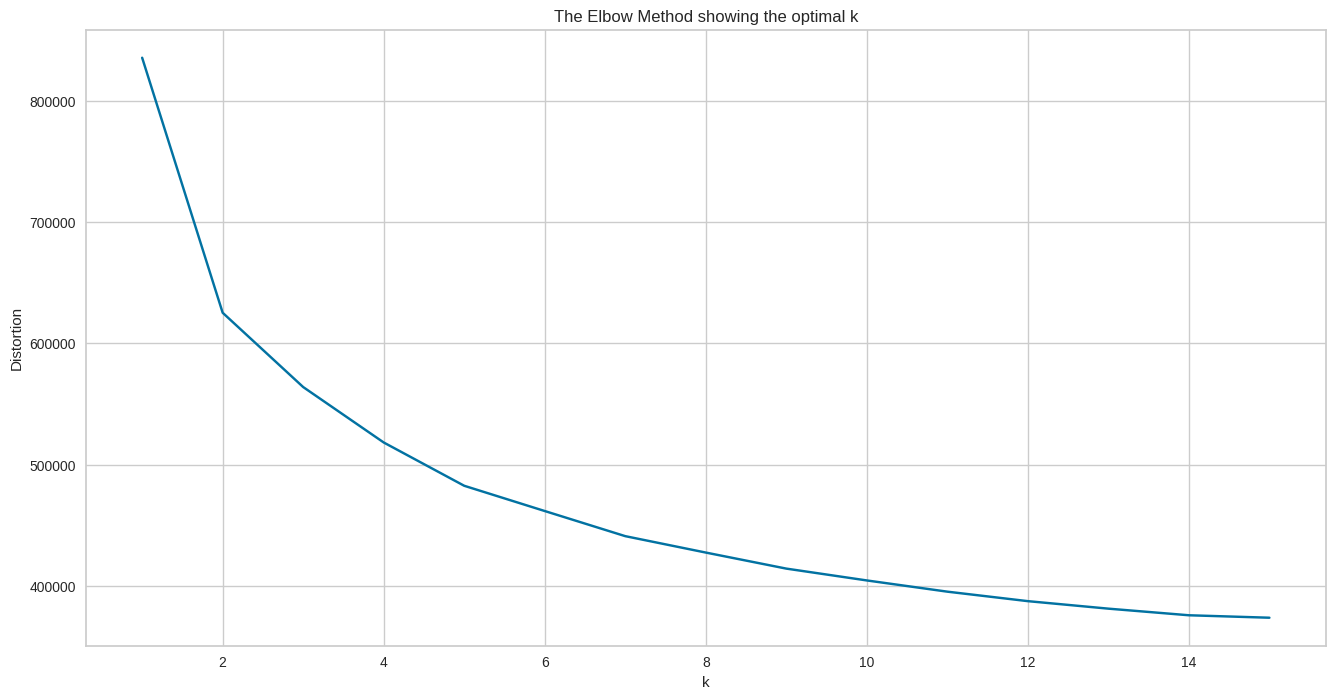

In [49]:
distortions = []
K = range(1,16)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init='auto')
  kmeanModel.fit(selected_feature)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Score (K Means)

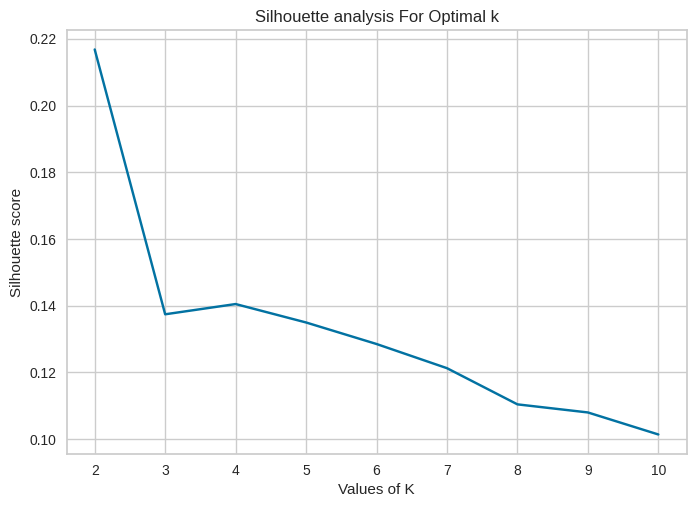

In [31]:
# Untuk yg enggak ada time
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

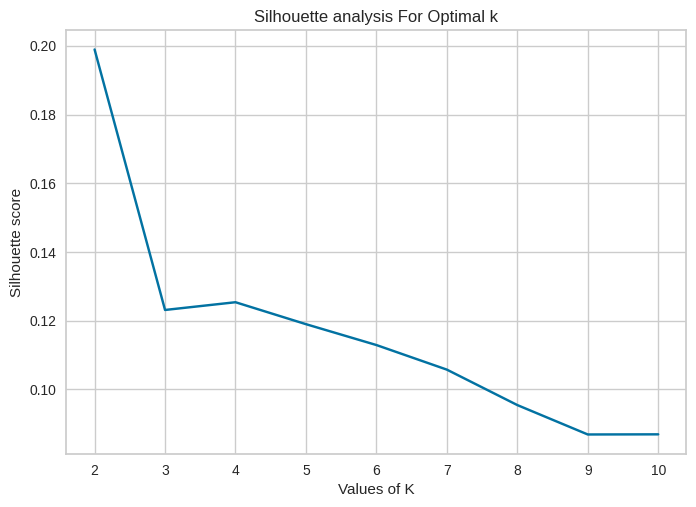

In [ ]:
# Untuk yang paling atas
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

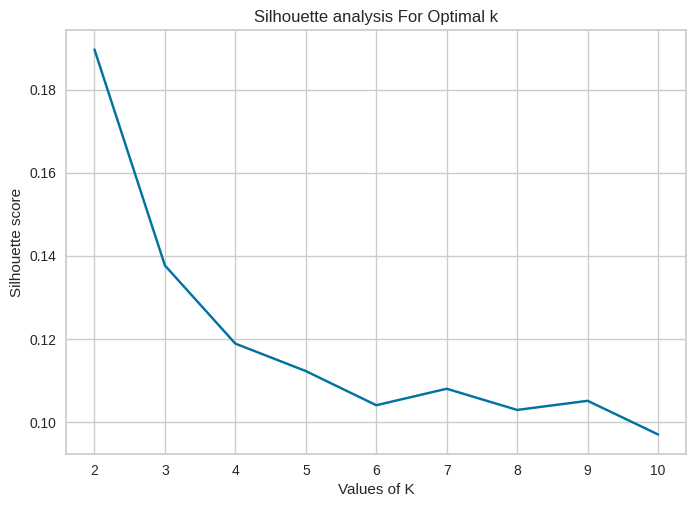

In [ ]:
# Untuk 1
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

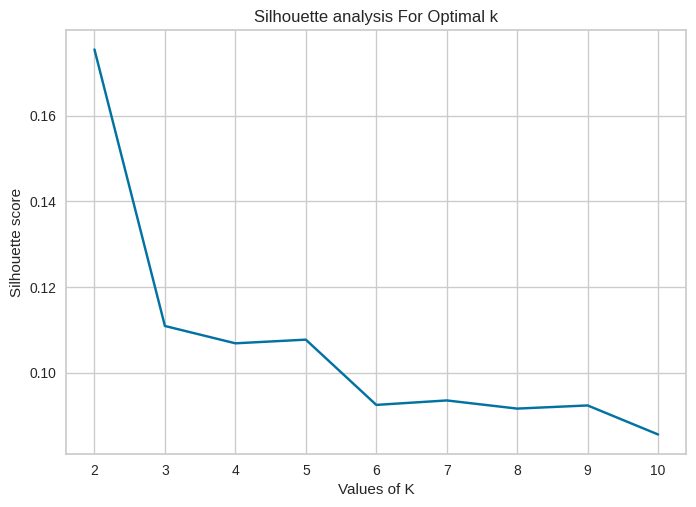

In [ ]:
# Untuk 2
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

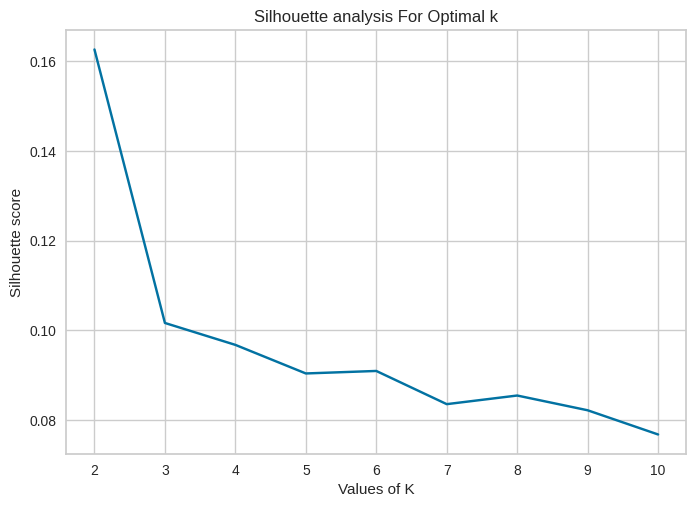

In [ ]:
# Untuk 3
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

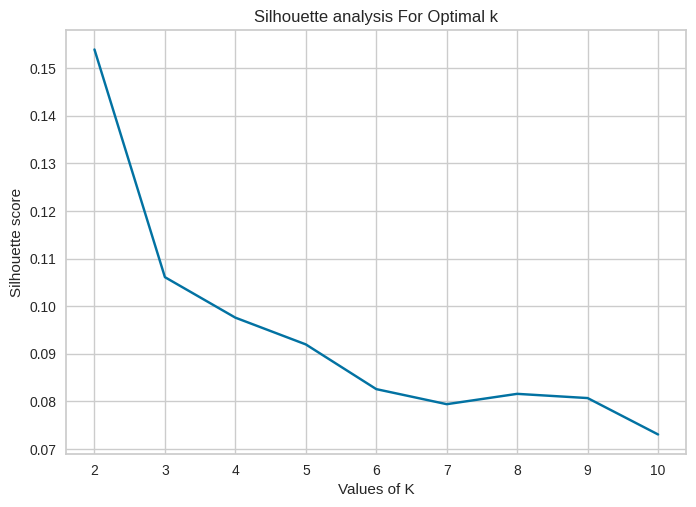

In [ ]:
# Untuk 4 (firstkill & death)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

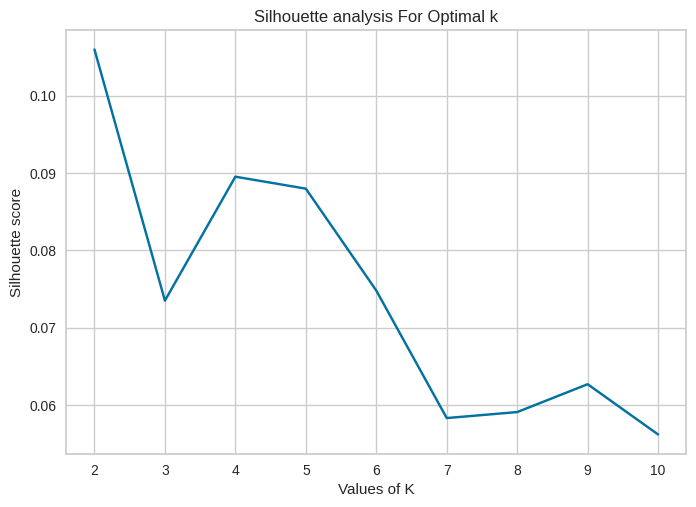

In [ ]:
# Untuk semua fitur
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(df_encoded_standarization)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(df_encoded_standarization, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Prediksi Cluster (K Means)

In [33]:
# Karena yang terbaik adalah n=4
model = KMeans(n_clusters=4,  n_init='auto')

cluster_assignment = model.fit_predict(selected_feature)
data_with_clusters = pd.DataFrame(selected_feature.copy())
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters.head()

,ACS,Kills,Deaths,Assists,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,...,Agent_raze,Agent_reyna,Agent_sage,Agent_skye,Agent_sova,Agent_viper,Agent_yoru,ADR,FirstKills,Clusters
0,1.773328,1.724370,-1.180433,-0.717402,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1.628564,1.111593,3
1,0.390898,0.265535,-1.180433,0.573506,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.767288,-0.606890,0
2,0.374824,0.447889,-1.439541,0.896233,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0.437977,0.538765,0
3,0.246225,0.447889,-0.662216,-1.040129,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.260656,0.538765,0
4,-1.972092,-1.740364,-0.403108,-0.717402,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-1.917865,0.538765,2


In [19]:
# # (semua fitur)
# model = KMeans(n_clusters=4,  n_init='auto')

# cluster_assignment = model.fit_predict(df_encoded_standarization)
# data_with_clusters = pd.DataFrame(df_encoded_standarization.copy())
# data_with_clusters['Clusters'] = cluster_assignment
# data_with_clusters.head()

## Visualisasi dalam 2D

In [34]:
pca = PCA(n_components = 2)
pca.fit(selected_feature)
data_pca = pca.transform(selected_feature)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca['Clusters'] = cluster_assignment
data_pca.head()

,PC1,PC2,Clusters
0,3.179911,-1.281108,3
1,0.587799,-1.084118,0
2,0.945985,-0.854083,0
3,0.659904,-0.841716,0
4,-2.835469,-0.150321,2


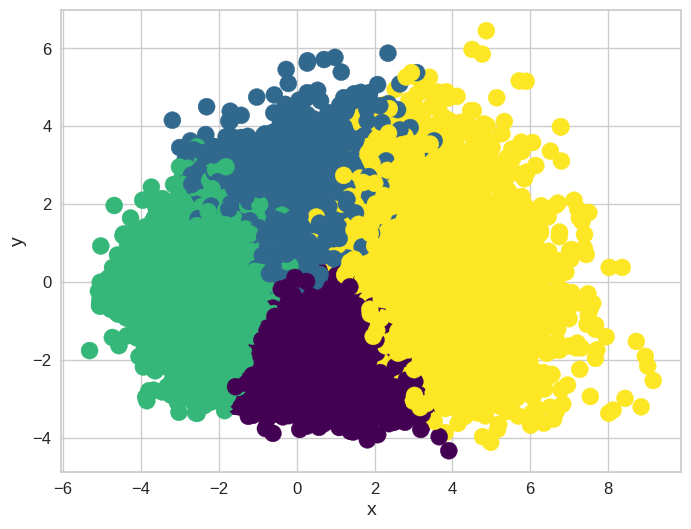

In [35]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=data_pca['PC1'], y=data_pca['PC2'], s=150,
            c=data_pca['Clusters'].astype('category'),
            cmap='viridis')
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Visualisasi dalam 3D

In [36]:
pca = PCA(n_components = 3)
pca.fit(selected_feature)
data_pca = pca.transform(selected_feature)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2', 'PC3'])
data_pca['Clusters'] = cluster_assignment
data_pca.head()

,PC1,PC2,PC3,Clusters
0,3.179911,-1.281108,-0.603738,3
1,0.587799,-1.084118,1.121784,0
2,0.945985,-0.854083,1.057293,0
3,0.659904,-0.841716,-0.897889,0
4,-2.835469,-0.150321,-1.137081,2


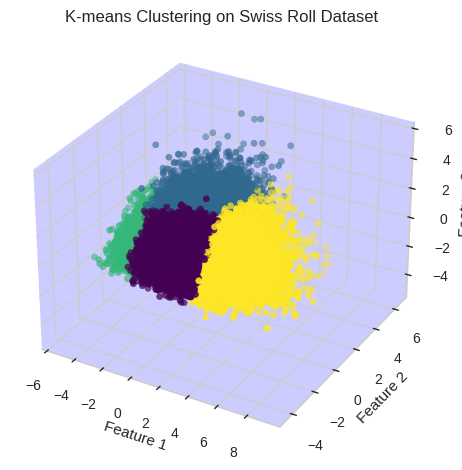

In [37]:
from sklearn.datasets import make_swiss_roll

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=data_pca['Clusters'], cmap='viridis')
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)# Set light blue background
ax.xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("K-means Clustering on Swiss Roll Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

## Analisis Hasil Clustering

In [38]:
analysis_data = df_encoded[['ACS', 'Kills', 'Deaths', 'Assists', 'Patch', 'Map_Ascent', 'Map_Bind', 'Map_Breeze',
          'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone',
          'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix',
          'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR',
          'FirstKills']].copy()

analysis_data['Clusters'] = cluster_assignment
analysis_data.head()

,ACS,Kills,Deaths,Assists,Patch,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,...,Agent_raze,Agent_reyna,Agent_sage,Agent_skye,Agent_sova,Agent_viper,Agent_yoru,ADR,FirstKills,Clusters
0,313.0,24.0,10.0,3.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,195.0,4.0,3
1,227.0,16.0,10.0,7.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,161.0,1.0,0
2,226.0,17.0,9.0,8.0,3.0,0,0,1,0,0,...,0,0,0,0,1,0,0,148.0,3.0,0
3,218.0,17.0,12.0,2.0,3.0,0,0,1,0,0,...,0,0,0,0,0,1,0,141.0,3.0,0
4,80.0,5.0,13.0,3.0,3.0,0,0,1,0,0,...,0,0,0,1,0,0,0,55.0,3.0,2


In [39]:
# Lihat seluruh fitur
print(list(analysis_data.columns.values))

['ACS', 'Kills', 'Deaths', 'Assists', 'Patch', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR', 'FirstKills', 'Clusters']


### Jumlah Tiap Cluster

In [40]:
# Jumlah Tiap Cluster
jac = analysis_data.groupby(['Clusters']).size().reset_index(name='Jumlah')
jac

,Clusters,Jumlah
0,0,28565
1,1,25148
2,2,34876
3,3,19661


<Axes: xlabel='Clusters'>

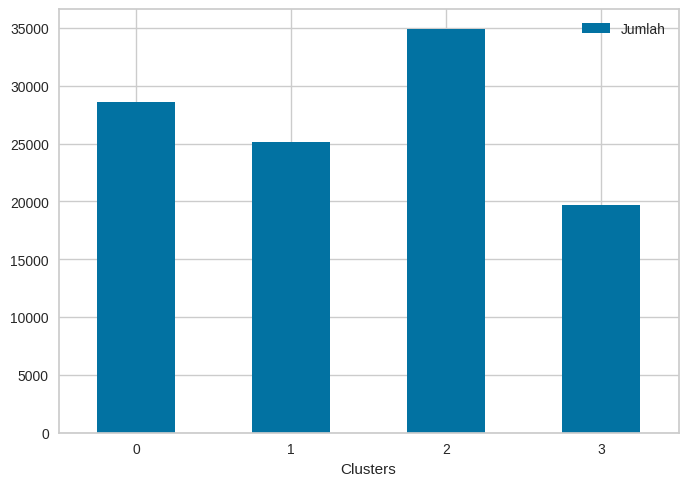

In [41]:
# Jumlah Tiap Cluster
jac.plot(x='Clusters', y='Jumlah', kind="bar", rot=0)

### Rerata untuk Fitur yang mempengaruhi ACS

In [42]:
# Lihat nilai rata-rata untuk kolom 'ACS', 'Kills', 'Deaths', 'Assists'
# column = []

# for i in list(df_encoded.columns.values):
#   if "Note_" not in i and "Agent_" not in i and "Map_" not in i:
#     column.append(i)

column = ['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'FirstKills']

acs_ad = analysis_data.groupby(['Clusters'])[column].mean().reset_index()
acs_ad

# print(list(x.columns.values))

,Clusters,ACS,Kills,Deaths,Assists,ADR,FirstKills
0,0,227.566813,15.438474,11.607422,4.357465,146.192648,1.807317
1,1,195.097622,15.321616,16.974829,8.442421,128.770479,1.843844
2,2,141.876735,9.200625,14.805970,3.862914,92.771218,1.111939
3,3,284.091603,21.727430,15.301256,4.774884,177.996287,4.382381


array([<Axes: title={'center': 'FirstKills'}, ylabel='Clusters'>],
      dtype=object)

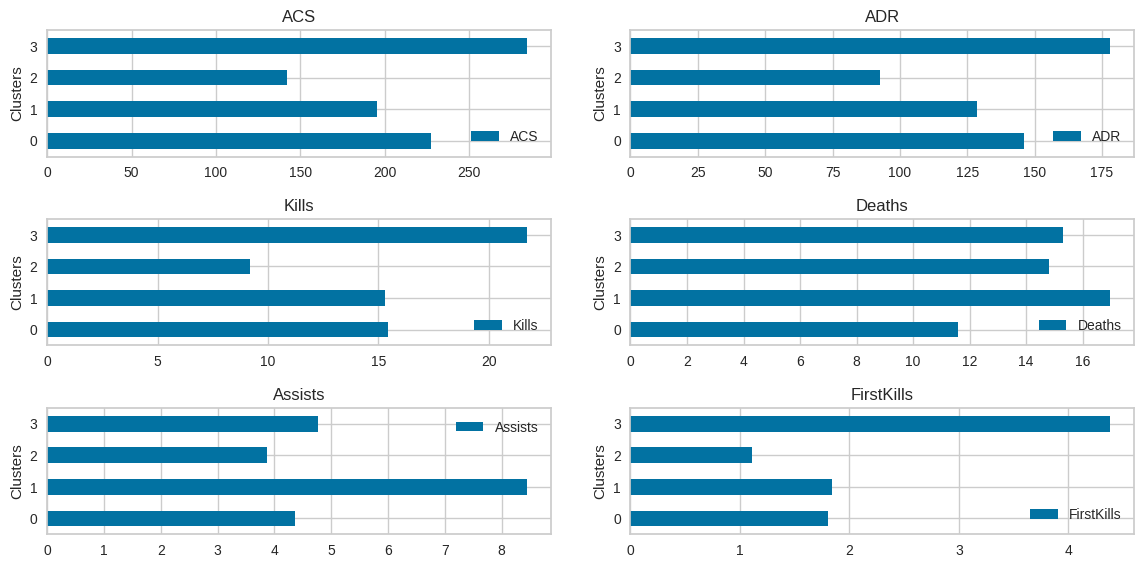

In [43]:
# Visualisasi
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))
fig.tight_layout(pad=2.0)

acs_ad.plot(x="Clusters", y="ACS", kind="barh", ax = axes[0,0],subplots=True)
acs_ad.plot(x="Clusters", y="ADR", kind="barh", ax = axes[0,1],subplots=True)
acs_ad.plot(x="Clusters", y="Kills", kind="barh", ax = axes[1,0],subplots=True)
acs_ad.plot(x="Clusters", y="Deaths", kind="barh", ax = axes[1,1],subplots=True)
acs_ad.plot(x="Clusters", y="Assists", kind="barh", ax = axes[2,0],subplots=True)
acs_ad.plot(x="Clusters", y="FirstKills", kind="barh", ax = axes[2,1],subplots=True)

### Patch yang digunakan

In [44]:
tes = analysis_data[['Patch', 'Clusters']]

any_patch = tes.groupby(['Clusters']).value_counts().reset_index(name='Jumlah')
any_patch

,Clusters,Patch,Jumlah
0,0,3.0,11209
1,0,2.0,10392
2,0,1.0,6964
3,1,3.0,9715
4,1,2.0,9517
5,1,1.0,5916
6,2,3.0,13722
7,2,2.0,12417
8,2,1.0,8737
9,3,3.0,7614


### Waktu Bermain (Enggak dipake)

In [ ]:
check = analysis_data[['Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
afternoon = [0, 0, 0, 0]
evening = [0, 0, 0, 0]
morning = [0, 0, 0, 0]
night = [0, 0, 0, 0]

for ind in check.index:
    if check['Note_Afternoon'][ind] == 1:
      afternoon[check['Clusters'][ind]] += 1
    if check['Note_Evening'][ind] == 1:
      evening[check['Clusters'][ind]] += 1
    if check['Note_Morning'][ind] == 1:
      morning[check['Clusters'][ind]] += 1
    if check['Note_Night'][ind] == 1:
      night[check['Clusters'][ind]] += 1

d = {'name': name, 'afternoon': afternoon, 'evening': evening, 'morning': morning, 'night': night}
any_time = pd.DataFrame(data=d)
any_time

,name,afternoon,evening,morning,night
0,Cluster 0,7466,4614,4436,3122
1,Cluster 1,13151,8395,7737,5628
2,Cluster 2,10547,7045,6301,4666
3,Cluster 3,9746,6096,5406,3894


<Axes: ylabel='name'>

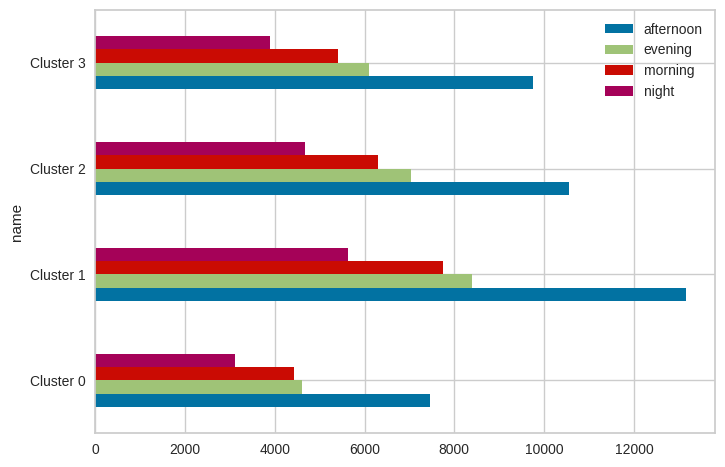

In [ ]:
any_time.plot(x="name", y=["afternoon", "evening", "morning", "night"], kind="barh")

### Agent yang digunakan

In [45]:
check = analysis_data[['Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
                       'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage',
                       'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
astra = [0, 0, 0, 0]
breach = [0, 0, 0, 0]
brimstone = [0, 0, 0, 0]
chamber = [0, 0, 0, 0]
cypher = [0, 0, 0, 0]
jett = [0, 0, 0, 0]
kayo = [0, 0, 0, 0]
killjoy = [0, 0, 0, 0]
phoenix = [0, 0, 0, 0]
raze = [0, 0, 0, 0]
reyna = [0, 0, 0, 0]
sage = [0, 0, 0, 0]
skye = [0, 0, 0, 0]
sova = [0, 0, 0, 0]
viper = [0, 0, 0, 0]
yoru = [0, 0, 0, 0]
omen = [0, 0, 0, 0]

for ind in check.index:
    if check['Agent_astra'][ind] == 1:
      astra[check['Clusters'][ind]] += 1
    elif check['Agent_breach'][ind] == 1:
      breach[check['Clusters'][ind]] += 1
    elif check['Agent_brimstone'][ind] == 1:
      brimstone[check['Clusters'][ind]] += 1
    elif check['Agent_chamber'][ind] == 1:
      chamber[check['Clusters'][ind]] += 1
    elif check['Agent_cypher'][ind] == 1:
      cypher[check['Clusters'][ind]] += 1
    elif check['Agent_jett'][ind] == 1:
      jett[check['Clusters'][ind]] += 1
    elif check['Agent_kayo'][ind] == 1:
      kayo[check['Clusters'][ind]] += 1
    elif check['Agent_killjoy'][ind] == 1:
      killjoy[check['Clusters'][ind]] += 1
    elif check['Agent_omen'][ind] == 1:
      omen[check['Clusters'][ind]] += 1
    elif check['Agent_phoenix'][ind] == 1:
      phoenix[check['Clusters'][ind]] += 1
    elif check['Agent_raze'][ind] == 1:
      raze[check['Clusters'][ind]] += 1
    elif check['Agent_reyna'][ind] == 1:
      reyna[check['Clusters'][ind]] += 1
    elif check['Agent_sage'][ind] == 1:
      sage[check['Clusters'][ind]] += 1
    elif check['Agent_skye'][ind] == 1:
      skye[check['Clusters'][ind]] += 1
    elif check['Agent_sova'][ind] == 1:
      sova[check['Clusters'][ind]] += 1
    elif check['Agent_viper'][ind] == 1:
      viper[check['Clusters'][ind]] += 1
    elif check['Agent_yoru'][ind] == 1:
      yoru[check['Clusters'][ind]] += 1

d = {'name': name, 'astra': astra, 'breach': breach, 'brimstone': brimstone, 'chamber': chamber, 'cypher':cypher,
     'jett':jett, 'kayo':kayo, 'killjoy':killjoy, 'phoenix':phoenix, 'raze':raze, 'reyna':reyna, 'sage':sage, 'skye':skye,
     'sova':sova, 'viper':viper, 'yoru':yoru, 'omen':omen}
any_agent = pd.DataFrame(data=d)
any_agent

,name,astra,breach,brimstone,chamber,cypher,jett,kayo,killjoy,phoenix,raze,reyna,sage,skye,sova,viper,yoru,omen
0,Cluster 0,1670,731,420,59,2602,3711,107,3210,715,2291,1146,1522,1243,4499,1610,33,2996
1,Cluster 1,1691,2251,500,12,1700,1296,420,1084,601,1593,683,2234,1255,5869,1476,28,2455
2,Cluster 2,2147,1904,695,48,3892,3891,204,3066,730,1870,1008,2318,1845,4887,1894,42,4435
3,Cluster 3,466,167,146,32,895,7038,55,1022,892,3364,1632,610,469,1284,584,46,959


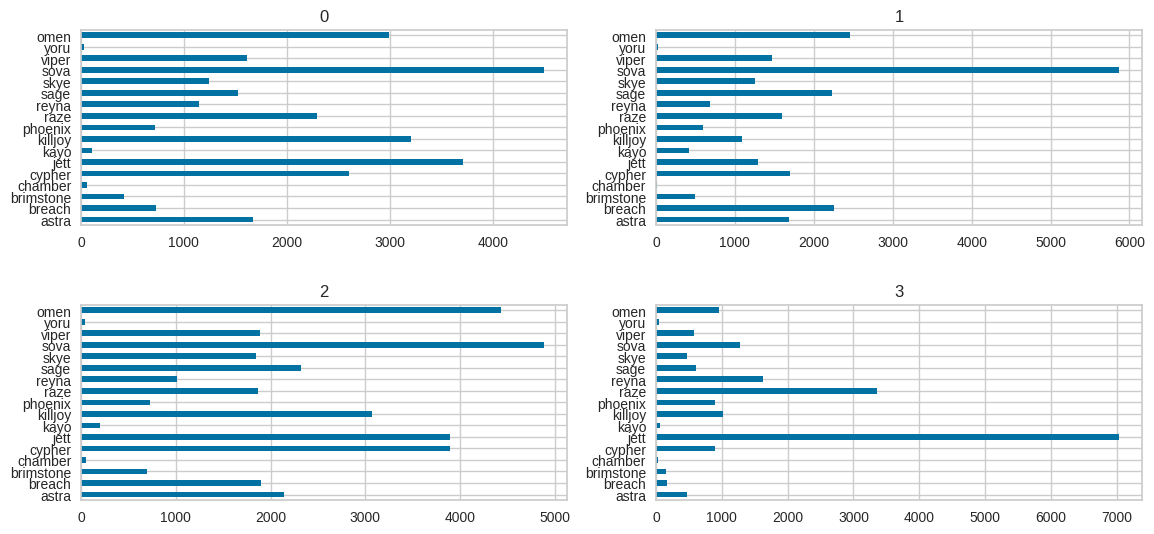

In [46]:
col_agent = [i for i in list(any_agent.columns.values) if i != "name"]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
fig.tight_layout(pad=3.0)

for k in range(4):
  if k == 0:
    ax = axes[0,0]
  elif k == 1:
    ax = axes[0,1]
  elif k == 2:
    ax = axes[1,0]
  else:
    ax = axes[1,1]

  row = any_agent.iloc[k, 1:]
  row.plot(kind='barh', ax = ax,subplots=True)

### Map yang digunakan

In [47]:
check = analysis_data[['Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
ascent = [0, 0, 0, 0]
bind = [0, 0, 0, 0]
breeze = [0, 0, 0, 0]
fracture = [0, 0, 0, 0]
haven = [0, 0, 0, 0]
icebox = [0, 0, 0, 0]
split = [0, 0, 0, 0]

for ind in check.index:
    if check['Map_Ascent'][ind] == 1:
      ascent[check['Clusters'][ind]] += 1
    elif check['Map_Bind'][ind] == 1:
      bind[check['Clusters'][ind]] += 1
    elif check['Map_Breeze'][ind] == 1:
      breeze[check['Clusters'][ind]] += 1
    elif check['Map_Fracture'][ind] == 1:
      fracture[check['Clusters'][ind]] += 1
    elif check['Map_Haven'][ind] == 1:
      haven[check['Clusters'][ind]] += 1
    elif check['Map_Icebox'][ind] == 1:
      icebox[check['Clusters'][ind]] += 1
    elif check['Map_Split'][ind] == 1:
      split[check['Clusters'][ind]] += 1

d = {'name': name, 'Ascent': ascent, 'Bind': bind, 'Breeze': breeze, 'Fracture': fracture, 'Haven':haven, 'Icebox':icebox, 'Split':split}
any_map = pd.DataFrame(data=d)
any_map

,name,Ascent,Bind,Breeze,Fracture,Haven,Icebox,Split
0,Cluster 0,6890,5913,1322,218,6450,3623,4149
1,Cluster 1,6327,5085,833,195,5674,3222,3812
2,Cluster 2,8322,7543,1650,261,7777,4261,5062
3,Cluster 3,4551,3989,855,146,4139,2984,2997


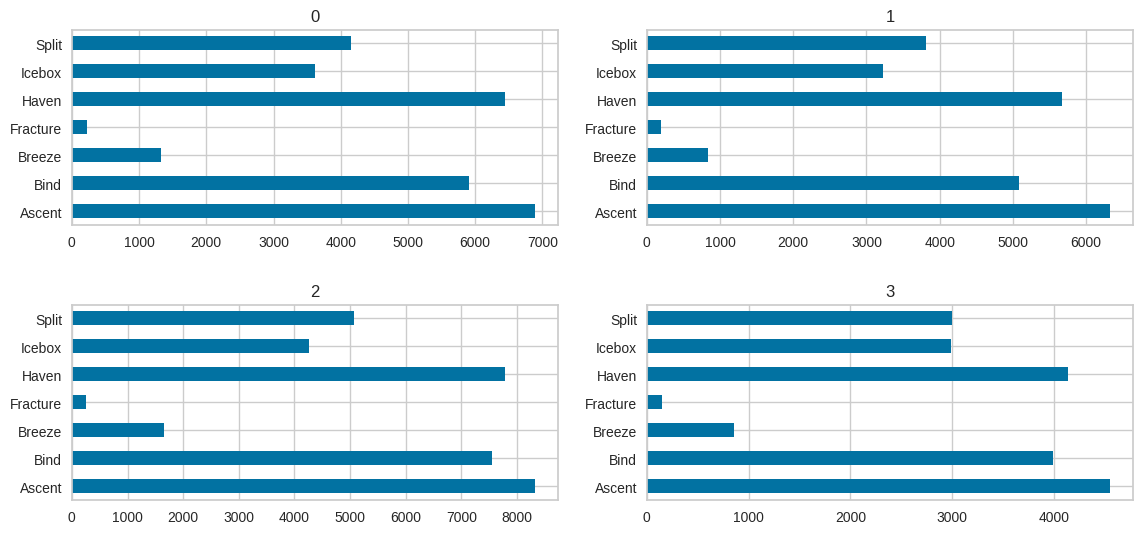

In [48]:
col_map = [i for i in list(any_map.columns.values) if i != "name"]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
fig.tight_layout(pad=3.0)

for k in range(4):
  if k == 0:
    ax = axes[0,0]
  elif k == 1:
    ax = axes[0,1]
  elif k == 2:
    ax = axes[1,0]
  else:
    ax = axes[1,1]

  row = any_map.iloc[k, 1:]
  row.plot(kind='barh', ax = ax,subplots=True)

## Uji Coba

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_encoded)
data_pca = pca.transform(df_encoded)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()